In [9]:
import re
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import colorcet as cc

In [6]:
df = pd.read_csv('../data/df_umap.csv')

In [7]:
## get annotation according to UniProt:

file_UNP = '../data/uniprot_Mtb.tab'
df_UNP = pd.read_csv(file_UNP, sep='\t')
df_UNP = df_UNP[['Entry', 'Gene names']]

file_UNP_2 = '../data/UP000001584.csv'
df_UNP_2 = pd.read_csv(file_UNP_2, sep='\t')
df_UNP_2 = df_UNP_2[['Entry', 'Annotation']]
df_UNP = df_UNP.merge(df_UNP_2, how = 'inner', on = 'Entry')

rvid = [re.findall('Rv\d\d\d\d[a-zA-Z]?', gn)[0] for gn in df_UNP['Gene names']]
df_UNP['Rv_ID'] = rvid
df_UNP = df_UNP[['Entry', 'Rv_ID', 'Annotation']]
df_UNP['Annotation'] = [int(a.strip()[0]) for a in df_UNP.Annotation]

df_w_annot = df.merge(df_UNP, how = 'inner', on = 'Rv_ID')

df_w_annot['Gene name'].fillna('', inplace=True)

## Show the genes in the CRISPRi library:

file_crispri = '../data/cloned_genes.xlsx'
df_crispri = pd.read_excel(file_crispri)
df_crispri.rename(columns = {'gene\nname':'gene_name'}, inplace=True)
df_crispri['gene_name'].fillna('', inplace=True)

df_crispri = df_crispri[df_crispri.gene_name.str.contains('Rv')].copy()
df_crispri = df_crispri[df_crispri.ID.values<=74].copy()

df_crispri['Rv_ID'] = [''.join(gn.split('_')) for gn in df_crispri.gene_name]
df_crispri = df_crispri[['ID', 'Rv_ID']]
df_crispri.reset_index(inplace=True, drop=True)

df_w_annot['CRISPRi'] = df_w_annot.Rv_ID.isin(df_crispri.Rv_ID)

# Filter outliers
df_w_annot_ = df_w_annot[(df_w_annot['u1'].values < 6) & (df_w_annot['u2'].values < 5)]

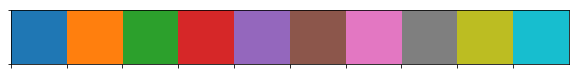

In [11]:
cols = sns.color_palette()
sns.palplot(cols)

### Simple vanilla UMAP:

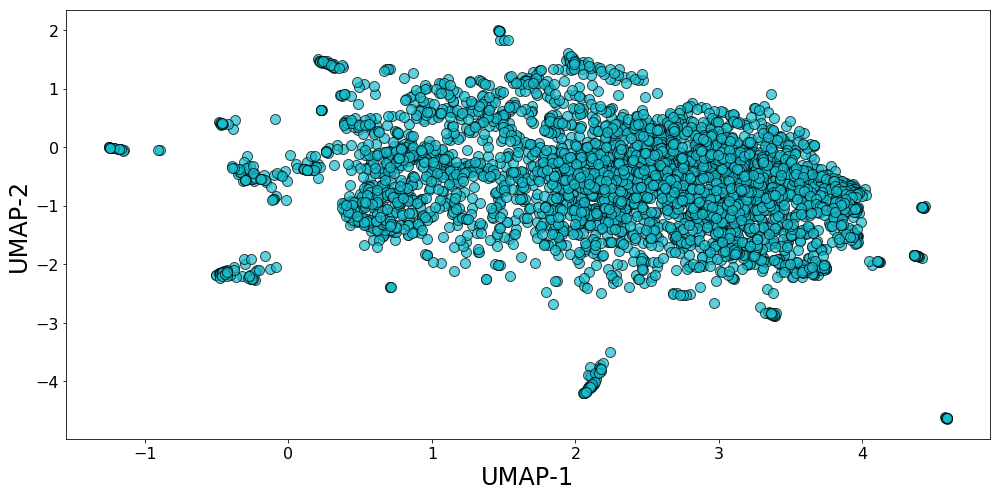

In [28]:
plt.figure(figsize=(14,7))

plt.scatter(df_w_annot_.u1, df_w_annot_.u2, s = 100, color = cols[-1], edgecolors='k', alpha = 0.7)

plt.xlabel('UMAP-1', fontsize = 24 )
plt.ylabel('UMAP-2', fontsize = 24 )
xt = plt.xticks(fontsize = 16)
yt = plt.yticks(fontsize = 16)

plt.tight_layout()
fig_file = '../figures/umap_vanilla.png'
plt.savefig(fig_file, dpi = 300)

### UMAP with neighborhood:

In [ ]:
plt.figure(figsize=(14,7))

plt.scatter(df_w_annot_.u1, df_w_annot_.u2, s = 100, color = cols[-1], edgecolors='k', alpha = 0.7)

for i in range(5):
    df_rv_rand = df_w_annot_.sample()
    plt.scatter(df_rv_rand.u1, df_rv_rand.u2, s = 100, color = 'k', edgecolors='k', alpha = 1)
    plt.scatter(df_rv_rand.u1, df_rv_rand.u2, s = 5000, color = cols[1], edgecolors='k', alpha = 0.7)

plt.xlabel('UMAP-1', fontsize = 24 )
plt.ylabel('UMAP-2', fontsize = 24 )
xt = plt.xticks(fontsize = 16)
yt = plt.yticks(fontsize = 16)

plt.tight_layout()
fig_file = '../figures/umap_rand_neighborhoods.png'
plt.savefig(fig_file, dpi = 300)